# **Task 3**

## **DJS Synapse Learning Period**
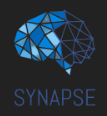

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

drive.mount("/content/gdrive")
df=pd.read_csv("/content/gdrive/MyDrive/synapse_w3/titanic_data.csv")

df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [4]:
total=len(df["Age"])
def titanic_preprocessing_pipeline(df):
  name,Title=[],[]
  for i in range(len(list(df["Name"]))):
    name.append(df["Name"][i])
    title_search = re.search('(\w+)\.', name[i]) 
    if title_search:
      title = title_search.group(1) 
    Title.append(title)
  df["Title"]=Title
  df

  df=df.drop(["PassengerId","Ticket","Name"],axis="columns")

  for col in df:
   c=df[col].isnull().sum()
   per=(c/total)*100
   if per>50.0:
     df=df.drop(col,axis='columns')

  df["Embarked"].fillna(df.mode()["Embarked"],inplace=True)
  df["Age"].fillna(df.mean()["Age"],inplace=True)
   
  Family_members=[]
  for i in range(total):
    Family_members.append(df["SibSp"][i]+df["Parch"][i])
  df=df.assign(Family_members=Family_members)

  for col in df:
    if col=="Age" or col=="Fare" or col=="Family_members":
      df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())

  df=pd.get_dummies(data=df,columns=["Pclass","Sex","Title","Embarked"])
       
  return df    
  
df=titanic_preprocessing_pipeline(df)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [5]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<b>remove the y_label (survived) from the dataframe</b>

In [6]:
df=df.drop("Survived",axis="columns")

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df,y,test_size=0.3,random_state=42,stratify=y)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [8]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

<b>print the test accuracy and train accuracy here</b>

In [9]:
print("Train accuracy = ",np.round(dt.score(X_train,y_train),3))
print("Test accuracy = ",np.round(dt.score(X_test,y_test),3))

Train accuracy =  0.982
Test accuracy =  0.795


Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [34]:
train=[]
test=[]
x=[]
for i in range(1,11):
  dt=DecisionTreeClassifier(random_state=42,max_depth=i)
  dt.fit(X_train,y_train)
  train.append(np.round(dt.score(X_train,y_train),3))
  test.append(np.round(dt.score(X_test,y_test),3))
  x.append(i)

In [35]:
pd.DataFrame({"Max Depth":x,"Train":train,"Test":test})

,Max Depth,Train,Test
0,1,0.788,0.769
1,2,0.820,0.810
2,3,0.835,0.821
3,4,0.851,0.821
4,5,0.864,0.817
5,6,0.870,0.825
6,7,0.886,0.787
7,8,0.905,0.813
8,9,0.917,0.791
9,10,0.928,0.799


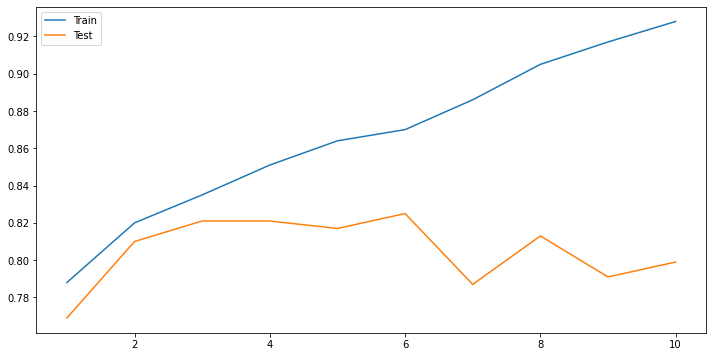

In [20]:
plt.figure(figsize=(12,6))
plt.plot(x,train)
plt.plot(x,test)
plt.legend(["Train","Test"])
plt.show()

In [78]:
dt=DecisionTreeClassifier(random_state=42,max_depth=4,min_samples_split=10)
dt.fit(X_train,y_train)
print("Train accuracy = ",np.round(dt.score(X_train,y_train),3))
print("Test accuracy = ",np.round(dt.score(X_test,y_test),3))

Train accuracy =  0.851
Test accuracy =  0.821


## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [99]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
param_grid={"max_depth":[3,4,5],"min_samples_split":[9,10],"criterion":["gini","entropy"]}

In [100]:
rf=RandomForestClassifier()
grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=4,verbose=4,n_jobs=4)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 4 folds for each of 12 candidates, totalling 48 fits


{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9}

In [101]:
print("Train accuracy = ",np.round(grid.score(X_train,y_train),3))
print("Test accuracy = ",np.round(grid.score(X_test,y_test),3))

Train accuracy =  0.843
Test accuracy =  0.821


### 2. Boosting

In [114]:
ada=AdaBoostClassifier(n_estimators=57,learning_rate=1)
model=ada.fit(X_train,y_train)
train=model.predict(X_train)
test=model.predict(X_test)

In [113]:
print("Train accuracy = ",np.round(accuracy_score(y_train,train),3))
print("Test accuracy = ",np.round(accuracy_score(y_test,test),3))

Train accuracy =  0.848
Test accuracy =  0.799


### 3. Pruning Techniques

In [82]:

dt=DecisionTreeClassifier(random_state=42)
alphas=dt.cost_complexity_pruning_path(X_train,y_train)
alphas=alphas["ccp_alphas"]

In [118]:
alphas_grid=GridSearchCV(estimator=dt,scoring=make_scorer(accuracy_score),param_grid={"ccp_alpha":list(alphas)})
alphas_grid.fit(X_train,y_train)
alphas_grid.best_params_

{'ccp_alpha': 0.008418663862290371}

In [122]:
dt=DecisionTreeClassifier(ccp_alpha=alphas_grid.best_params_["ccp_alpha"])
dt.fit(X_train,y_train)
print("Train accuracy = ",np.round(dt.score(X_train,y_train),3))
print("Test accuracy = ",np.round(dt.score(X_test,y_test),3))

Train accuracy =  0.827
Test accuracy =  0.817


## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.


The best model of the three listed above turned out to be Bagging, as it yields the highest test accuracy of the three. That being said, its test accuracy equals that of the "play-around-with-hyperparameters" (or pre-pruning) method with the latter giving the higher train accuracy too. So pre-pruning yields the best results in this notebook.

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

# **Bonus: To be done only if you have completed the above tasks.**

#**Naive Bayes Algorithm**

Naive Bayes Algorithm is a probabilistic ML model used for classification of data points in a dataset into distinct classes. It is based on conditional probabilty and Bayes rule.

For events A and B in a sample space S (such that probabitility of both A and B not occurring is zero), the probability of event B occuring after A is given by:

> P(B/A) = P(A ∩ B) / P(A)

Bayes Theorem states that for a sample space S, if there are events E1, E2, E3,...,En be n mutually exclusive and exhaustive events such that Π Ei>0 ∀ i=1,2,3,...,n and A be an event occuring along with an event Ei, then:

> P(Ei/A) = [P(Ei).P(A/Ei)] / Σ P(Ek).P(A/Ek)

To transform above equation in terms more familiar to ML developers, for Y (output class) and X (features):

> P(Y/X) = [P(Y).P(X/Y)] / P(X)

In naive Bayes, we assume that the data points in X are independent (which is why this algorithm is termed "naive"). On simplifying the mathematical equations that follow, one finds that:

So, on this we then apply the "argmax" function for all distinct outputs. For example,to determine weather, if we find out that P("Rain") = 0.6, and P("Sunshine") = 0.4, we assign the value of P("Rain") = 0.6 to the output.

This the basic working of Naive Bayes Algorithm: to classify the output with the class of the data point that has the highest probability of occuring, calculated with help of Naive Baye's Theorem.

# **End of Task**

> ©DJS Synapse 2022 - 2023